In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import FinanceDataReader as fdr

In [ ]:
# 삼성전자, 현대자동차, LG전자, 두산밥캣, LG 디스플레이
# 005930, 005380, 066570, 241560, 034220

In [72]:
df = fdr.DataReader('005930','2015-01-01','2015-12-31')

In [73]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356
...,...,...,...,...,...,...
2015-12-23,25840,25980,25640,25900,207148,0.002322
2015-12-24,25900,26000,25700,25700,156151,-0.007722
2015-12-28,25700,25780,25320,25320,227230,-0.014786


In [74]:
sell_price = df.iloc[0,0]

In [75]:
start = 1000000000
sell = int(start/sell_price)
sell

37314

In [76]:
buy_price = df.iloc[-1,0]

In [77]:
buy = buy_price * sell
buy

940312800

In [69]:
diff = int(buy / start *100)

In [70]:
diff

94

-12
875286165
121
1939304165
130
4470571027
74
7785040977
108
16211402977
137
38553511977
129
88541818577


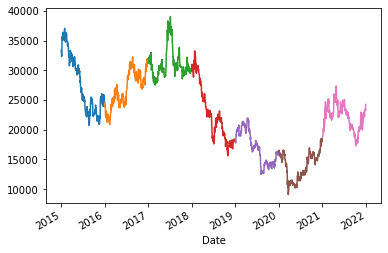

In [123]:
start_total = 1000000000
stock_list = ['005930', '005380', '066570', '000150', '034220']
y = 2015
diff = 0
sell = 0
sell_total = 0

for year in range(2015, 2022):

    for stock in stock_list[:]:
        stock_df = fdr.DataReader(stock, str(year)+'-01-01', str(year)+'-12-31')

        buy_price = stock_df.iloc[0,3]
        start = start_total/5
        buy_num = int(start/buy_price)  # 주식수


        sell_price = stock_df.iloc[-1,3]
        sell = sell_price * buy_num
        sell_total+=sell

#         print(buy_price)
#         print(sell_price)
#         print(buy_num)
#         print(sell)
#         print('='*100)
        


    total = sell_total - start_total
    diff = int(total / start_total *100)  # 수익률

    print(diff)
    print(sell_total)
    stock_df['Open'].plot()

    y += 1
    start_total = sell_total

In [117]:
df = fdr.DataReader('000150', '2015-01-01', '2015-12-31')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,81530,81924,79167,79955,56857,-0.019330
2015-01-05,79561,81136,79167,80349,69258,0.004928
2015-01-06,80742,81924,78222,78774,142272,-0.019602
2015-01-07,79167,80742,78773,79955,59541,0.014992
2015-01-08,79955,80742,79167,79955,31795,0.000000
...,...,...,...,...,...,...
2015-12-23,75465,76095,74677,74914,99010,-0.007301
2015-12-24,76489,76804,75228,75386,74787,0.006301
2015-12-28,75780,76016,73574,73732,122963,-0.021940


2015년 수익률 : -12%
수익금액 : 87448950원
2016년 수익률 : 21%
수익금액 : 106284768원
2017년 수익률 : 30%
수익금액 : 138625682원
2018년 수익률 : -26%
수익금액 : 102751930원
2019년 수익률 : 8%
수익금액 : 111344850원
2020년 수익률 : 37%
수익금액 : 153629400원
2021년 수익률 : 29%
수익금액 : 199128800원
2022년 수익률 : -20%
수익금액 : 158018500원


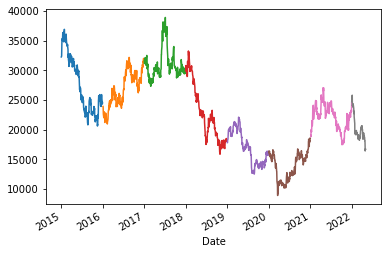

In [134]:
start_total = 100_000_000
stock_list = ['005930', '005380', '066570', '000150', '034220']
y = 2015
diff = 0
sell = 0


for year in range(2015, 2023):
    sell_total = 0
    rest_total = 0

    for stock in stock_list[:]:
        stock_df = fdr.DataReader(stock, str(year)+'-01-01', str(year)+'-12-31')

        buy_price = stock_df.iloc[0,3]
        start = start_total/5
        
        buy_num = int(start/buy_price)  # 주식수
        rest = start - (buy_num * buy_price)


        sell_price = stock_df.iloc[-1,3]
        sell = sell_price * buy_num
        sell_total+=sell
        rest_total+=rest

    
    total = sell_total - start_total
    diff = int(total / start_total *100)  # 수익률

    print(f'{year}년 수익률 : {diff}%')
    print(f'수익금액 : {int(sell_total)}원')
    stock_df['Close'].plot()

    y += 1
    start_total = sell_total + rest_total